<a href="https://colab.research.google.com/github/Nataliaa1994/CC-GENERAL-Clustering/blob/master/CC%20General%20clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.0)


In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving CC GENERAL.csv to CC GENERAL.csv


In [ ]:
import io
raw_data = pd.read_csv(io.StringIO(uploaded['CC GENERAL.csv'].decode('utf-8')))

In [ ]:
raw_data.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [ ]:
nulls_summary = pd.DataFrame(raw_data.isnull().any(), columns=['Nulls'])   
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(raw_data.isnull().sum())   
nulls_summary['Num_of_nulls [%]'] = round((raw_data.isnull().mean()*100),2)   
print(nulls_summary) 

                                  Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
CUST_ID                           False                   0              0.00
BALANCE                           False                   0              0.00
BALANCE_FREQUENCY                 False                   0              0.00
PURCHASES                         False                   0              0.00
ONEOFF_PURCHASES                  False                   0              0.00
INSTALLMENTS_PURCHASES            False                   0              0.00
CASH_ADVANCE                      False                   0              0.00
PURCHASES_FREQUENCY               False                   0              0.00
ONEOFF_PURCHASES_FREQUENCY        False                   0              0.00
PURCHASES_INSTALLMENTS_FREQUENCY  False                   0              0.00
CASH_ADVANCE_FREQUENCY            False                   0              0.00
CASH_ADVANCE_TRX                  False                   0     

In [ ]:


raw_data.dropna(axis=0, subset=['CREDIT_LIMIT'], inplace=True)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans




In [ ]:
X= raw_data.iloc[:, [3,13]].values

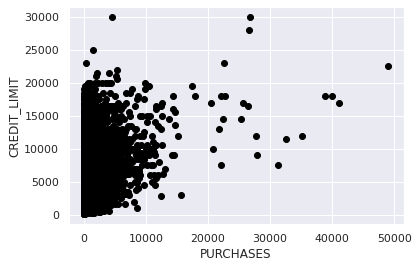

In [ ]:
#Visualise data points
plt.scatter(X[:,0],X[:,1],c='black')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.show()


In [ ]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 2 2 ... 0 0 0]


array([[  532.56972031,  2130.68007127],
       [ 1360.13643052, 12792.30245232],
       [  913.99218638,  6511.74468701],
       [ 6828.25410095,  8395.74132492],
       [27690.86583333, 16333.33333333]])

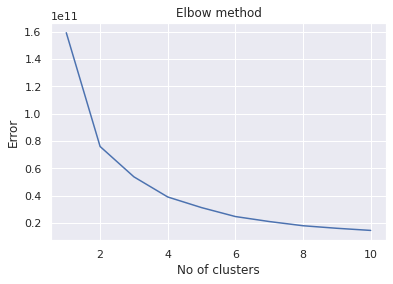

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters= 4)
y_kmeans= kmeansmodel.fit_predict(X)

In [ ]:
kmeans.cluster_centers_

array([[  389.19358527,  3108.0832795 ],
       [  689.54789529,  7975.68776773],
       [ 9456.33865546, 10395.37815126],
       [ 2240.014     , 16743.94736842],
       [27690.86583333, 16333.33333333],
       [  382.94514622,  1364.30364146],
       [ 1085.88670886, 11383.72513562],
       [ 3004.06583878,  3412.09150327],
       [  575.37838761,  5516.44884107],
       [ 4154.86310541,  7160.11396011]])

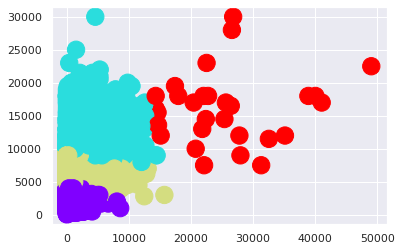

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s = 300, c = y_kmeans, cmap='rainbow')